In [1]:
#Project Description: Financial and Market Data Analysis of AI tools for Google, OpenAI, and Meta

#Project goals:
#Amount spent on R&D
#Revenue analysis
#Data wise impact on stocks
#AI based revenue growth
#Expanditure vs Revenue
#Change in the index wrt Year & Company

In [2]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset
df=pd.read_csv('ai_market_dataset.csv')

In [4]:
#Having the first look at the data
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22


In [5]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [6]:
#As the event column has more than 50 percent data as missing, we can drop the column
df=df.drop('Event',axis=1)

In [7]:
#now let's look again at the missing values for each column:
df.isnull().sum()

Date                   0
Company                0
R&D_Spending_USD_Mn    0
AI_Revenue_USD_Mn      0
AI_Revenue_Growth_%    0
Stock_Impact_%         0
dtype: int64

In [8]:
#converting the Date col to datetime from object type
df['Date']=pd.to_datetime(df['Date'])

In [9]:
#the number of companies we're working with
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [10]:
#now for the ease of analysis we'll create a separate colmun named year; only having the year values for Date col
df['Year']=df['Date'].dt.year

In [11]:
#let's look at the dataset again now
df.head(10)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,-0.09,2015
5,2015-01-06,OpenAI,5.47,1.08,8.32,0.74,2015
6,2015-01-07,OpenAI,6.95,0.67,-32.95,-0.80,2015
7,2015-01-08,OpenAI,5.06,1.43,43.49,-0.09,2015
8,2015-01-09,OpenAI,5.26,0.33,-67.28,-0.72,2015
9,2015-01-10,OpenAI,2.00,0.74,-25.80,0.50,2015


In [12]:
# Convert data types
df['Company'] = df['Company'].astype('category')

numeric_cols = [
    'R&D_Spending_USD_Mn',
    'AI_Revenue_USD_Mn',
    'AI_Revenue_Growth_%',
    'Stock_Impact_%'
]

df[numeric_cols] = df[numeric_cols].astype(float)
df['Year'] = df['Year'].astype(int) 


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  category      
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Stock_Impact_%       10959 non-null  float64       
 6   Year                 10959 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 524.7 KB


In [14]:
#finding out outliers
outliers={}

for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1

    condition = ((df[col] < q1 - 1.5 * IQR) | 
             (df[col] > q3 + 1.5 * IQR))
    outliers[col]=df[condition]

for col, rows in outliers.items():
    print(f"{col}: {len(rows)} outliers")

R&D_Spending_USD_Mn: 0 outliers
AI_Revenue_USD_Mn: 0 outliers
AI_Revenue_Growth_%: 0 outliers
Stock_Impact_%: 131 outliers
Year: 0 outliers


In [15]:
df['Stock_Impact_%'].unique()

array([-3.60e-01,  4.10e-01,  2.30e-01,  9.30e-01, -9.00e-02,  7.40e-01,
       -8.00e-01, -7.20e-01,  5.00e-01, -4.00e-01, -7.60e-01, -3.50e-01,
        3.10e-01,  5.30e-01, -8.20e-01, -2.10e-01, -4.10e-01,  5.60e-01,
        2.43e+00,  3.60e-01, -3.70e-01, -7.80e-01, -8.80e-01, -6.80e-01,
       -5.20e-01, -8.70e-01, -5.60e-01,  5.40e-01, -5.10e-01, -6.30e-01,
        4.20e-01, -4.30e-01,  2.90e-01,  5.10e-01, -5.40e-01, -8.90e-01,
        6.20e-01,  7.00e-02, -6.70e-01, -1.40e-01, -3.20e-01, -7.90e-01,
        9.00e-02, -2.30e-01, -1.70e-01,  5.80e-01, -8.10e-01,  7.00e-01,
        8.20e-01, -1.80e-01,  3.00e-01, -5.80e-01,  8.50e-01, -1.90e-01,
       -9.20e-01,  3.20e-01, -1.00e-02,  2.70e-01,  6.70e-01,  9.20e-01,
        5.90e-01,  2.00e-01,  1.60e-01, -1.00e-01,  3.40e-01, -1.50e-01,
        2.80e+00, -9.40e-01,  8.80e-01, -5.50e-01,  2.20e-01,  4.70e-01,
       -8.50e-01, -6.00e-01,  1.90e-01, -8.60e-01, -3.80e-01,  6.40e-01,
        1.40e-01, -2.00e-02,  4.90e-01,  2.10e-01, 

In [16]:
#seems real data, not dirty
#so we will not remove the outliers

In [17]:
#Analysis part

In [18]:
df.head(5)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,-0.09,2015


In [19]:
#R&D Spending
rd=df.groupby('Company')['R&D_Spending_USD_Mn'].sum()
print(rd)

Company
Google    423341.14
Meta      264533.07
OpenAI     26482.77
Name: R&D_Spending_USD_Mn, dtype: float64


C:\Users\Owner\AppData\Local\Temp\ipykernel_5396\1999305456.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd=df.groupby('Company')['R&D_Spending_USD_Mn'].sum()


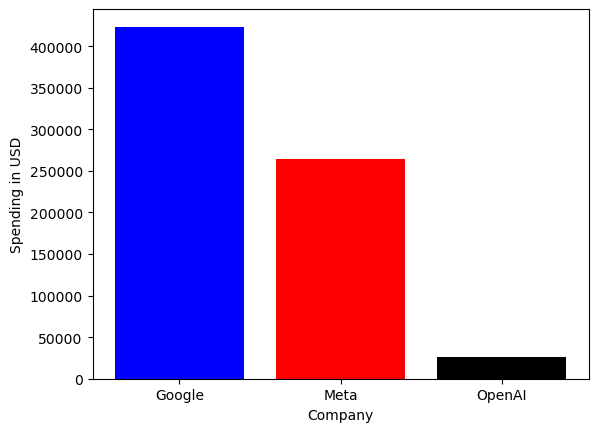

In [20]:
#takeaway: google spends the most, and OpenAI spends the least amount 
plt.bar(rd.index, rd.values, color=['blue', 'red', 'black'])
plt.xlabel('Company')
plt.ylabel('Spending in USD')
plt.show()

In [21]:
#Impact analysis of R&D spending on AI Revenue
df['R&D_Efficiency']=df['AI_Revenue_USD_Mn'] / df['R&D_Spending_USD_Mn']
rd_efficiency_summary=df.groupby(['Company', 'Year'])['R&D_Efficiency'].mean().reset_index()
print(rd_efficiency_summary)

   Company  Year  R&D_Efficiency
0   Google  2015        0.375623
1   Google  2016        0.415813
2   Google  2017        0.462534
3   Google  2018        0.514371
4   Google  2019        0.571597
5   Google  2020        0.635357
6   Google  2021        0.705902
7   Google  2022        0.784448
8   Google  2023        0.871457
9   Google  2024        0.967905
10    Meta  2015        0.400415
11    Meta  2016        0.443813
12    Meta  2017        0.494095
13    Meta  2018        0.549052
14    Meta  2019        0.608612
15    Meta  2020        0.677613
16    Meta  2021        0.752986
17    Meta  2022        0.836331
18    Meta  2023        0.929327
19    Meta  2024        1.033260
20  OpenAI  2015        0.199307
21  OpenAI  2016        0.235281
22  OpenAI  2017        0.251440
23  OpenAI  2018        0.293867
24  OpenAI  2019        0.307657
25  OpenAI  2020        0.344594
26  OpenAI  2021        0.379288
27  OpenAI  2022        0.423422
28  OpenAI  2023        0.469553
29  OpenAI

C:\Users\Owner\AppData\Local\Temp\ipykernel_5396\3731783005.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd_efficiency_summary=df.groupby(['Company', 'Year'])['R&D_Efficiency'].mean().reset_index()


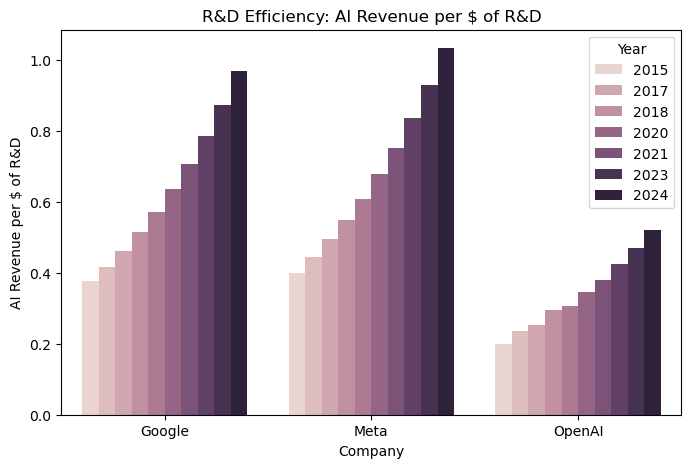

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=rd_efficiency_summary, x='Company', y='R&D_Efficiency', hue='Year')
plt.title("R&D Efficiency: AI Revenue per $ of R&D")
plt.ylabel("AI Revenue per $ of R&D")
plt.show()

In [23]:
#revenue earned by companies
rev=df.groupby('Company')['AI_Revenue_USD_Mn'].sum()
print(rev)

Company
Google    284498.38
Meta      189621.82
OpenAI      9462.89
Name: AI_Revenue_USD_Mn, dtype: float64


C:\Users\Owner\AppData\Local\Temp\ipykernel_5396\2206297520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev=df.groupby('Company')['AI_Revenue_USD_Mn'].sum()


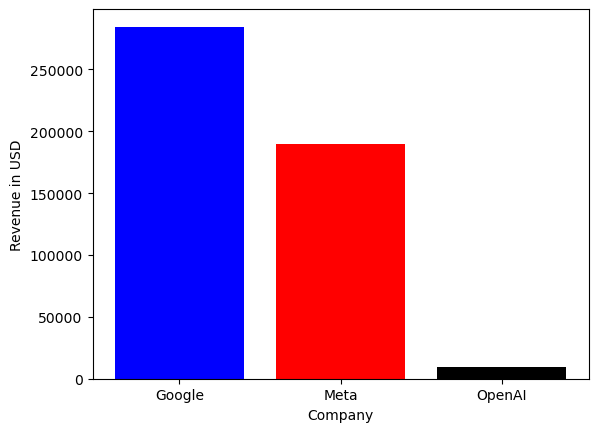

In [24]:
plt.bar(rev.index, rev.values, color=['blue','red','black'])
plt.xlabel("Company")
plt.ylabel("Revenue in USD")
plt.show()

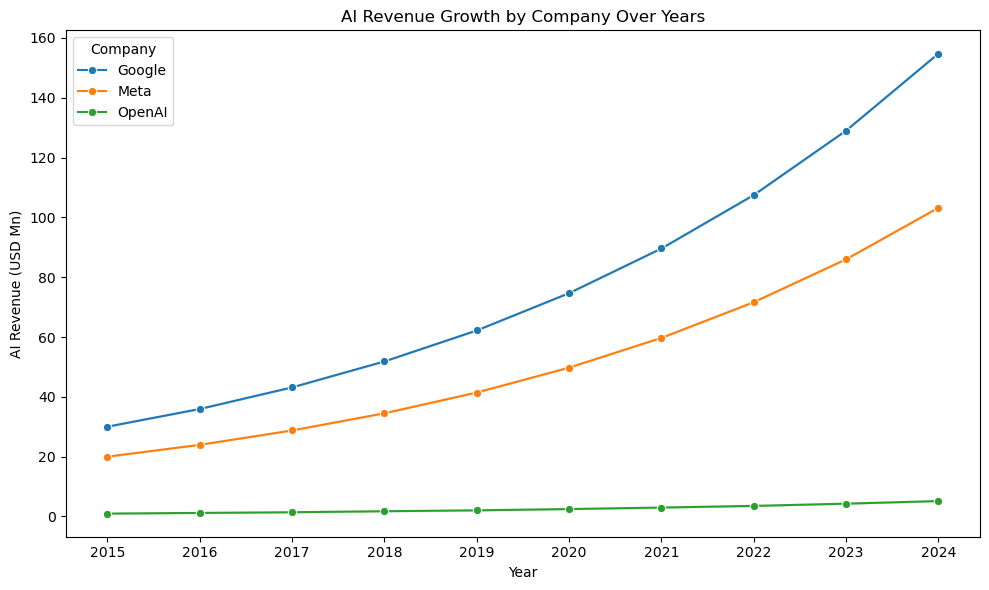

In [25]:
#revenue scenario over the years
plt.close('all')
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='AI_Revenue_USD_Mn', hue='Company', marker='o')
plt.title('AI Revenue Growth by Company Over Years')
plt.xlabel('Year')
plt.ylabel('AI Revenue (USD Mn)')
plt.xticks(df['Year'].unique())
plt.legend(title='Company')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_5396\2838735782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df.groupby(['Company','Year']).agg({


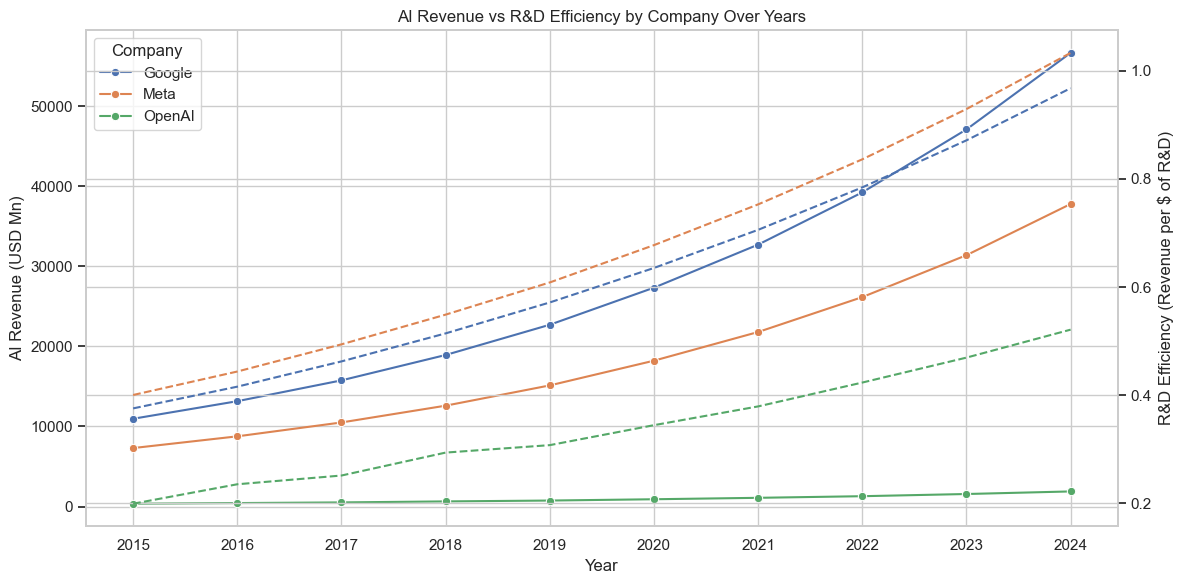

In [26]:
df_summary = df.groupby(['Company','Year']).agg({
    'AI_Revenue_USD_Mn': 'sum',
    'R&D_Efficiency': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

# Lineplot for absolute revenue
ax = sns.lineplot(data=df_summary, x='Year', y='AI_Revenue_USD_Mn', hue='Company', marker='o')
ax.set_ylabel('AI Revenue (USD Mn)')
ax.set_title('AI Revenue vs R&D Efficiency by Company Over Years')

# Secondary axis for R&D efficiency
ax2 = ax.twinx()
sns.lineplot(data=df_summary, x='Year', y='R&D_Efficiency', hue='Company', linestyle='--', ax=ax2, legend=False)
ax2.set_ylabel('R&D Efficiency (Revenue per $ of R&D)')

plt.xticks(df_summary['Year'].unique())
plt.tight_layout()
plt.show()


In [27]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year,R&D_Efficiency
0,2015-01-01,OpenAI,5.92,0.63,-36.82,-0.36,2015,0.106419
1,2015-01-02,OpenAI,5.41,1.81,80.59,0.41,2015,0.334566
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0.23,2015,0.135556
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0.93,2015,0.174312
4,2015-01-05,OpenAI,3.40,1.48,48.45,-0.09,2015,0.435294


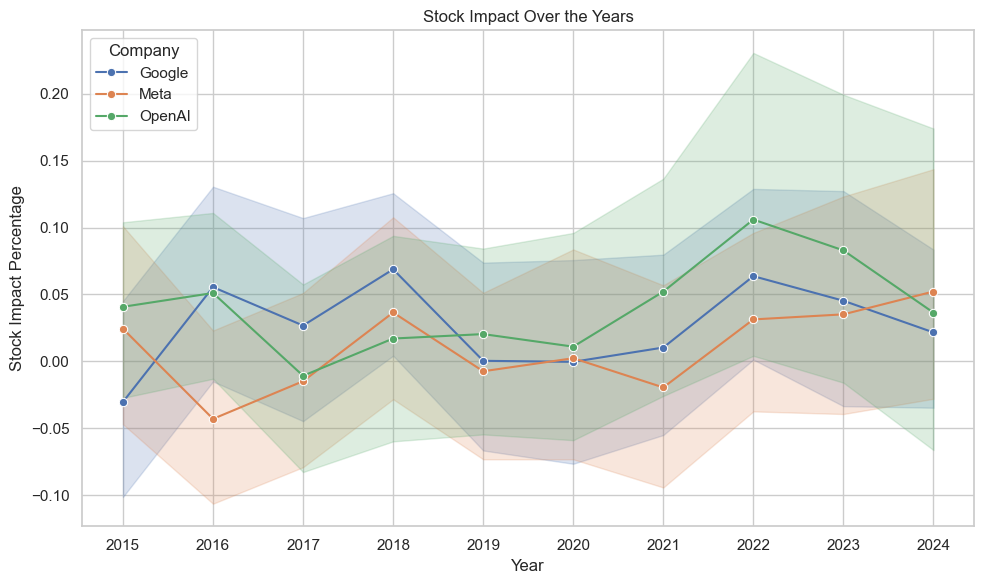

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Stock_Impact_%", hue="Company", marker="o")
plt.title('Stock Impact Over the Years')
plt.xlabel('Year')
plt.ylabel('Stock Impact Percentage')
plt.xticks(df['Year'].unique())
plt.legend(title="Company")
plt.tight_layout()
plt.show()

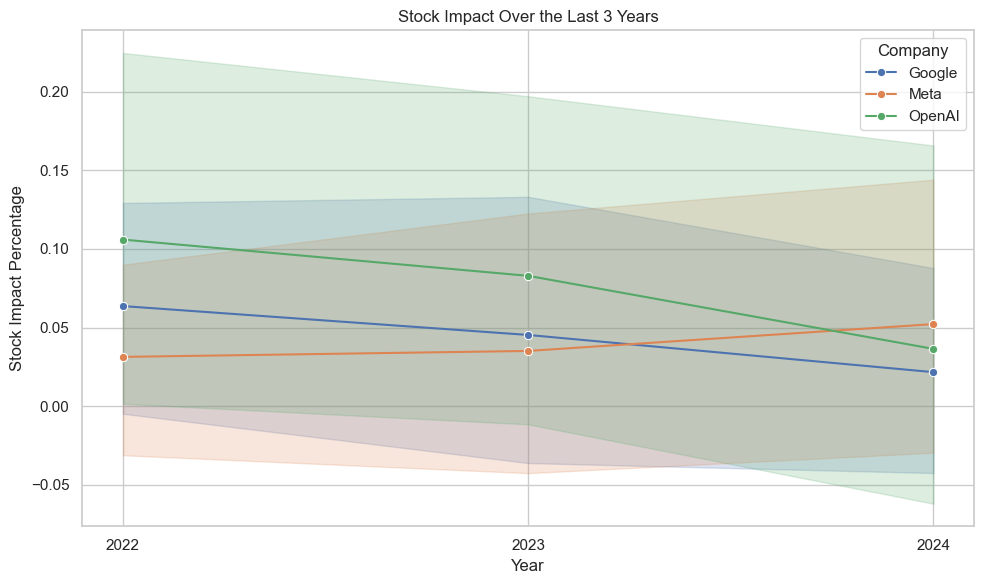

In [29]:
#stock impact of last 3 years
last_3_years= sorted(df['Year'].unique())[-3:]
df_last3 = df[df['Year'].isin(last_3_years)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_last3, x="Year", y="Stock_Impact_%", hue="Company", marker="o")
plt.title('Stock Impact Over the Last 3 Years')
plt.xlabel('Year')
plt.ylabel('Stock Impact Percentage')
plt.xticks(last_3_years)
plt.legend(title="Company")
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_5396\3622967269.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_last_year_agg=df_last_year.groupby('Company')['Stock_Impact_%'].mean()


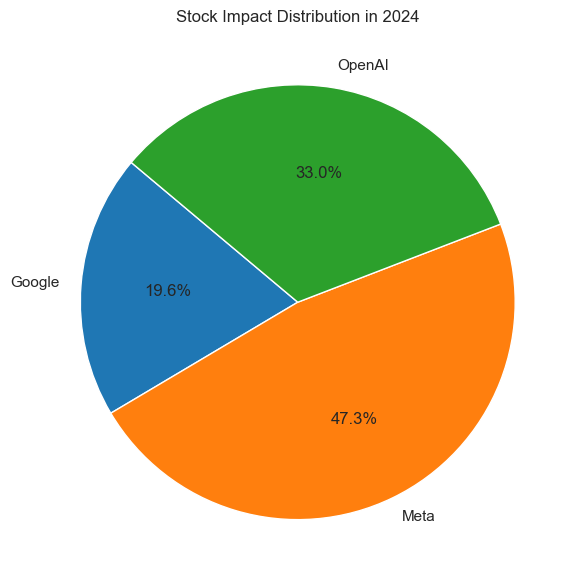

In [30]:
last_year=df['Year'].max()
df_last_year=df[df['Year']==last_year]
df_last_year_agg=df_last_year.groupby('Company')['Stock_Impact_%'].mean()

plt.figure(figsize=(10,6))
plt.pie(df_last_year_agg, labels=df_last_year_agg.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.title(f'Stock Impact Distribution in {last_year}')
plt.tight_layout()
plt.show()

In [32]:
#creating separate dataframes
data_openAI=df[df['Company']=='OpenAI']
data_google=df[df['Company']=='Google']
data_meta=df[df['Company']=='Meta']

In [33]:
print(data_openAI)

           Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0    2015-01-01  OpenAI                 5.92               0.63   
1    2015-01-02  OpenAI                 5.41               1.81   
2    2015-01-03  OpenAI                 4.50               0.61   
3    2015-01-04  OpenAI                 5.45               0.95   
4    2015-01-05  OpenAI                 3.40               1.48   
...         ...     ...                  ...                ...   
3648 2024-12-27  OpenAI                10.06               4.71   
3649 2024-12-28  OpenAI                 9.67               5.32   
3650 2024-12-29  OpenAI                 9.17               5.46   
3651 2024-12-30  OpenAI                10.36               6.31   
3652 2024-12-31  OpenAI                10.24               4.92   

      AI_Revenue_Growth_%  Stock_Impact_%  Year  R&D_Efficiency  
0                  -36.82           -0.36  2015        0.106419  
1                   80.59            0.41  2015        0.334566

In [34]:
print(data_google)

           Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
3653 2015-01-01  Google                79.89              30.19   
3654 2015-01-02  Google                78.99              30.44   
3655 2015-01-03  Google                79.20              30.46   
3656 2015-01-04  Google                79.59              30.55   
3657 2015-01-05  Google                81.50              30.59   
...         ...     ...                  ...                ...   
7301 2024-12-27  Google               162.16             155.36   
7302 2024-12-28  Google               159.69             154.47   
7303 2024-12-29  Google               161.69             154.59   
7304 2024-12-30  Google               158.48             155.05   
7305 2024-12-31  Google               159.48             154.77   

      AI_Revenue_Growth_%  Stock_Impact_%  Year  R&D_Efficiency  
3653                 0.64           -0.02  2015        0.377895  
3654                 1.47           -0.98  2015        0.385365

In [35]:
print(data_meta)

            Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
7306  2015-01-01    Meta                50.39              18.95   
7307  2015-01-02    Meta                49.80              19.77   
7308  2015-01-03    Meta                49.09              19.96   
7309  2015-01-04    Meta                50.66              20.48   
7310  2015-01-05    Meta                51.36              19.84   
...          ...     ...                  ...                ...   
10954 2024-12-27    Meta               100.19             103.54   
10955 2024-12-28    Meta                99.12             102.37   
10956 2024-12-29    Meta                98.95             103.11   
10957 2024-12-30    Meta               100.74             103.21   
10958 2024-12-31    Meta               100.08             103.41   

       AI_Revenue_Growth_%  Stock_Impact_%  Year  R&D_Efficiency  
7306                 -5.23           -0.42  2015        0.376067  
7307                 -1.16            0.63  2015 

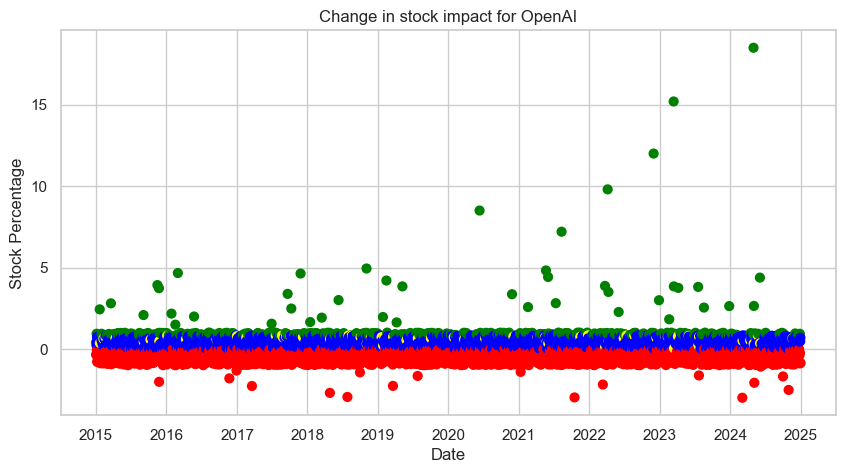

In [57]:
high_threshold=data_openAI['Stock_Impact_%'].quantile(0.90)
fracture_threshold=data_openAI['Stock_Impact_%'].diff().abs().quantile(0.90)
colors=[]

changes = data_openAI['Stock_Impact_%']
jump = changes.diff().abs()

for i in range(len(changes)):
    val=changes.iloc[i]

    if val<0: 
        colors.append('red')
    elif val>high_threshold:
        colors.append('green')
    elif i>0 and jump.iloc[i]>fracture_threshold:
        colors.append('yellow')
    else:
        colors.append('blue')

plt.close('all')
plt.figure(figsize=(10,5))
plt.scatter(data_google['Date'], changes, c=colors, s=40)
plt.title('Change in stock impact for OpenAI')
plt.xlabel('Date')
plt.ylabel('Stock Percentage')
plt.show()

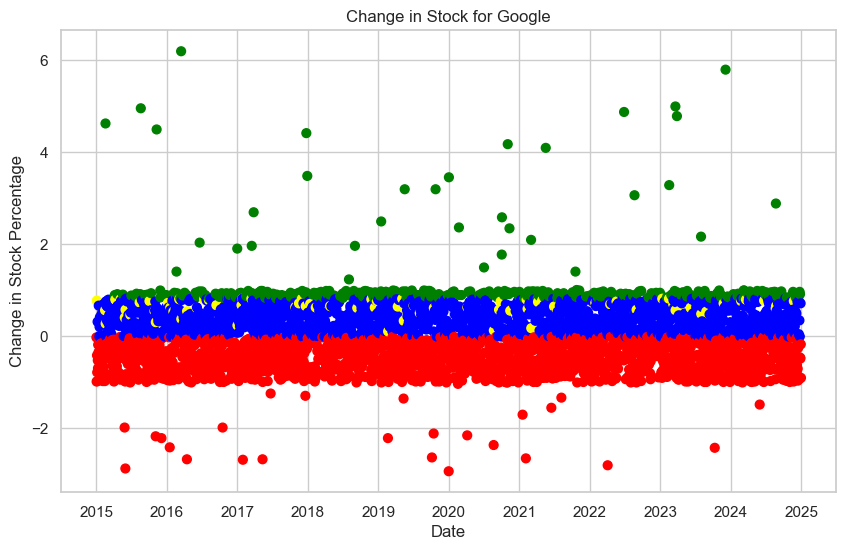

In [56]:
high_threshold=data_google['Stock_Impact_%'].quantile(0.90)
fracture_threshold=data_google['Stock_Impact_%'].diff().abs().quantile(0.90)
colors=[]

changes=data_google['Stock_Impact_%']
jump=changes.diff().abs()

for i in range(len(changes)):
    val=changes.iloc[i]

    if val<0:
        colors.append('red')
    elif val>high_threshold:
        colors.append('green')
    elif i>0 and jump.iloc[i]>fracture_threshold:
        colors.append('yellow')
    else:
        colors.append('blue')
plt.close('all')
plt.figure(figsize=(10,6))
plt.scatter(data_google['Date'], changes, c=colors, s=40)
plt.title('Change in Stock for Google')
plt.xlabel('Date')
plt.ylabel('Change in Stock Percentage')
plt.show()

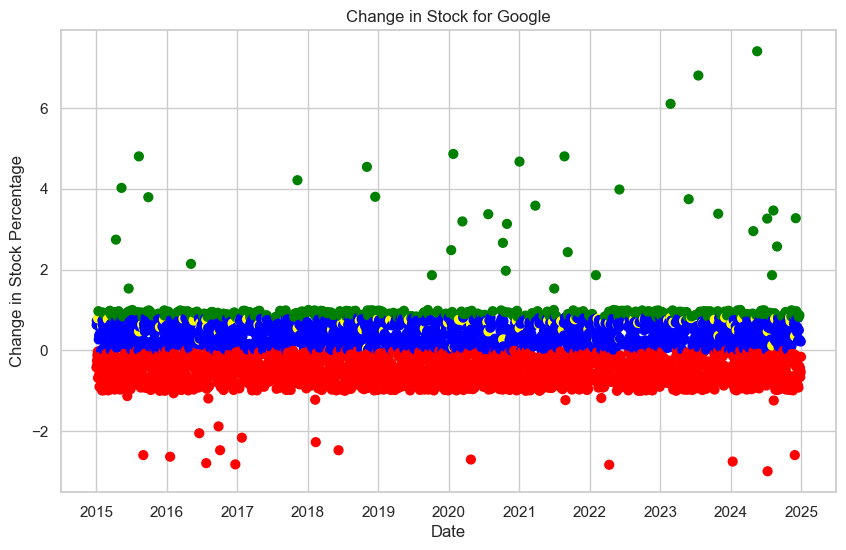

In [55]:
high_threshold=data_meta['Stock_Impact_%'].quantile(0.90)
fracture_threshold=data_meta['Stock_Impact_%'].diff().abs().quantile(0.90)
colors=[]

changes=data_meta['Stock_Impact_%']
jump=changes.diff().abs()

for i in range(len(changes)):
    val=changes.iloc[i]

    if val<0:
        colors.append('red')
    elif val>high_threshold:
        colors.append('green')
    elif i>0 and jump.iloc[i]>fracture_threshold:
        colors.append('yellow')
    else:
        colors.append('blue')
plt.close('all')
plt.figure(figsize=(10,6))
plt.scatter(data_meta['Date'], changes, c=colors, s=40)
plt.title('Change in Stock for Meta')
plt.xlabel('Date')
plt.ylabel('Change in Stock Percentage')
plt.show()

In [58]:
#Analysing revenue growth in each year

In [59]:
data_openAI

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year,R&D_Efficiency
0,2015-01-01,OpenAI,5.92,0.63,-36.82,-0.36,2015,0.106419
1,2015-01-02,OpenAI,5.41,1.81,80.59,0.41,2015,0.334566
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0.23,2015,0.135556
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0.93,2015,0.174312
4,2015-01-05,OpenAI,3.40,1.48,48.45,-0.09,2015,0.435294
...,...,...,...,...,...,...,...,...
3648,2024-12-27,OpenAI,10.06,4.71,370.69,0.93,2024,0.468191
3649,2024-12-28,OpenAI,9.67,5.32,432.15,-0.25,2024,0.550155
3650,2024-12-29,OpenAI,9.17,5.46,445.74,0.47,2024,0.595420
3651,2024-12-30,OpenAI,10.36,6.31,530.88,0.69,2024,0.609073


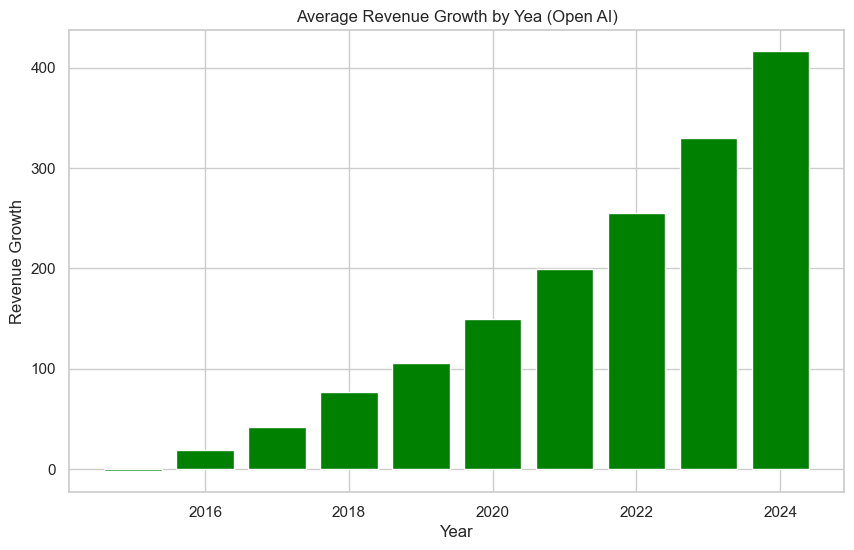

In [62]:
#for OpenAI
yearly_growth=data_openAI.groupby('Year')['AI_Revenue_Growth_%'].mean()

plt.figure(figsize=(10,6))
plt.bar(yearly_growth.index, yearly_growth.values, color='green')

plt.title("Average Revenue Growth by Yea (Open AI)")
plt.xlabel("Year")
plt.ylabel("Revenue Growth")
plt.show()

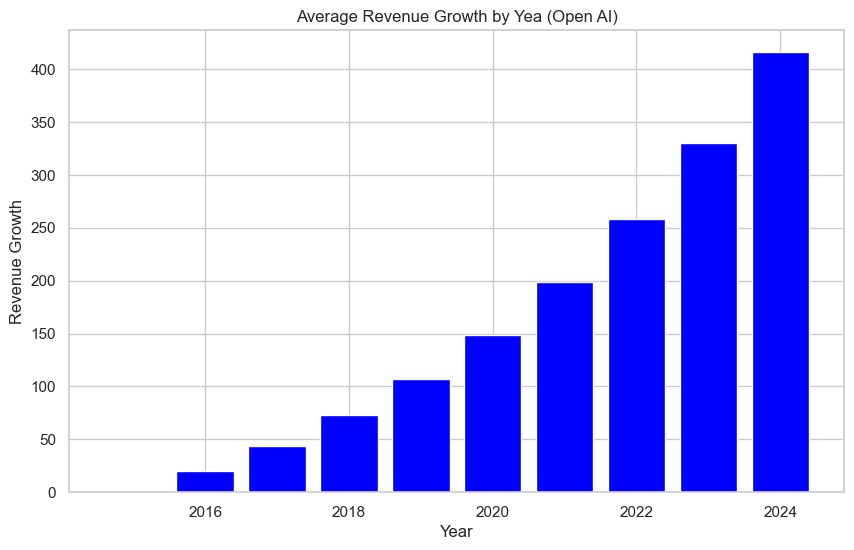

In [66]:
#for google
google_yearly=data_google.groupby('Year')['AI_Revenue_Growth_%'].mean()

plt.figure(figsize=(10,6))
plt.bar(google_yearly.index, google_yearly.values, color='blue')

plt.title("Average Revenue Growth by Yea (Google)")
plt.xlabel("Year")
plt.ylabel("Revenue Growth")
plt.show()

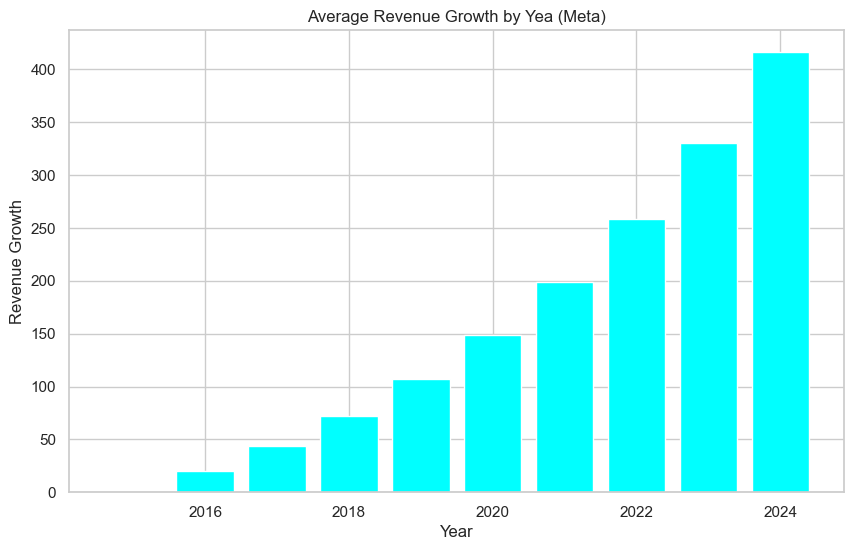

In [67]:
#for google
meta_yearly=data_meta.groupby('Year')['AI_Revenue_Growth_%'].mean()

plt.figure(figsize=(10,6))
plt.bar(meta_yearly.index, meta_yearly.values, color='cyan')

plt.title("Average Revenue Growth by Yea (Meta)")
plt.xlabel("Year")
plt.ylabel("Revenue Growth")
plt.show()

In [68]:
#correlation between variables

In [69]:
df.corr(numeric_only=True)

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year,R&D_Efficiency
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628,0.297701,0.755657
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017,0.526478,0.874589
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937,0.952199,0.730596
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000,0.016525,0.005706
Year,0.297701,0.526478,0.952199,0.016525,1.000000,0.701748
R&D_Efficiency,0.755657,0.874589,0.730596,0.005706,0.701748,1.000000


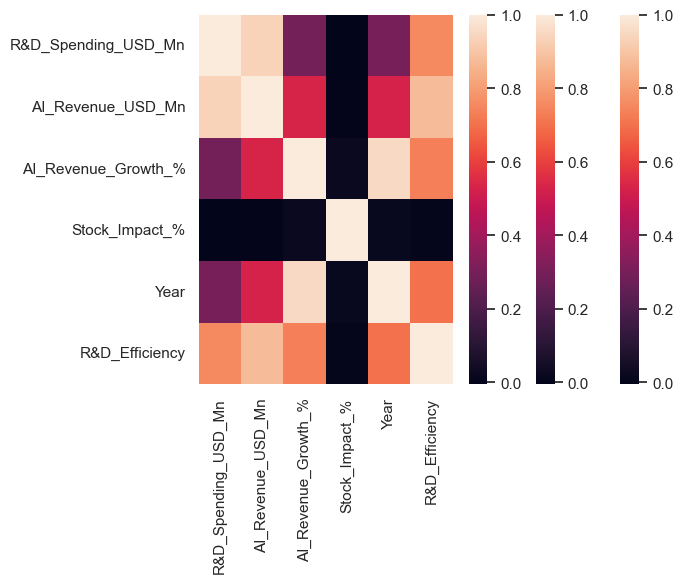

In [72]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

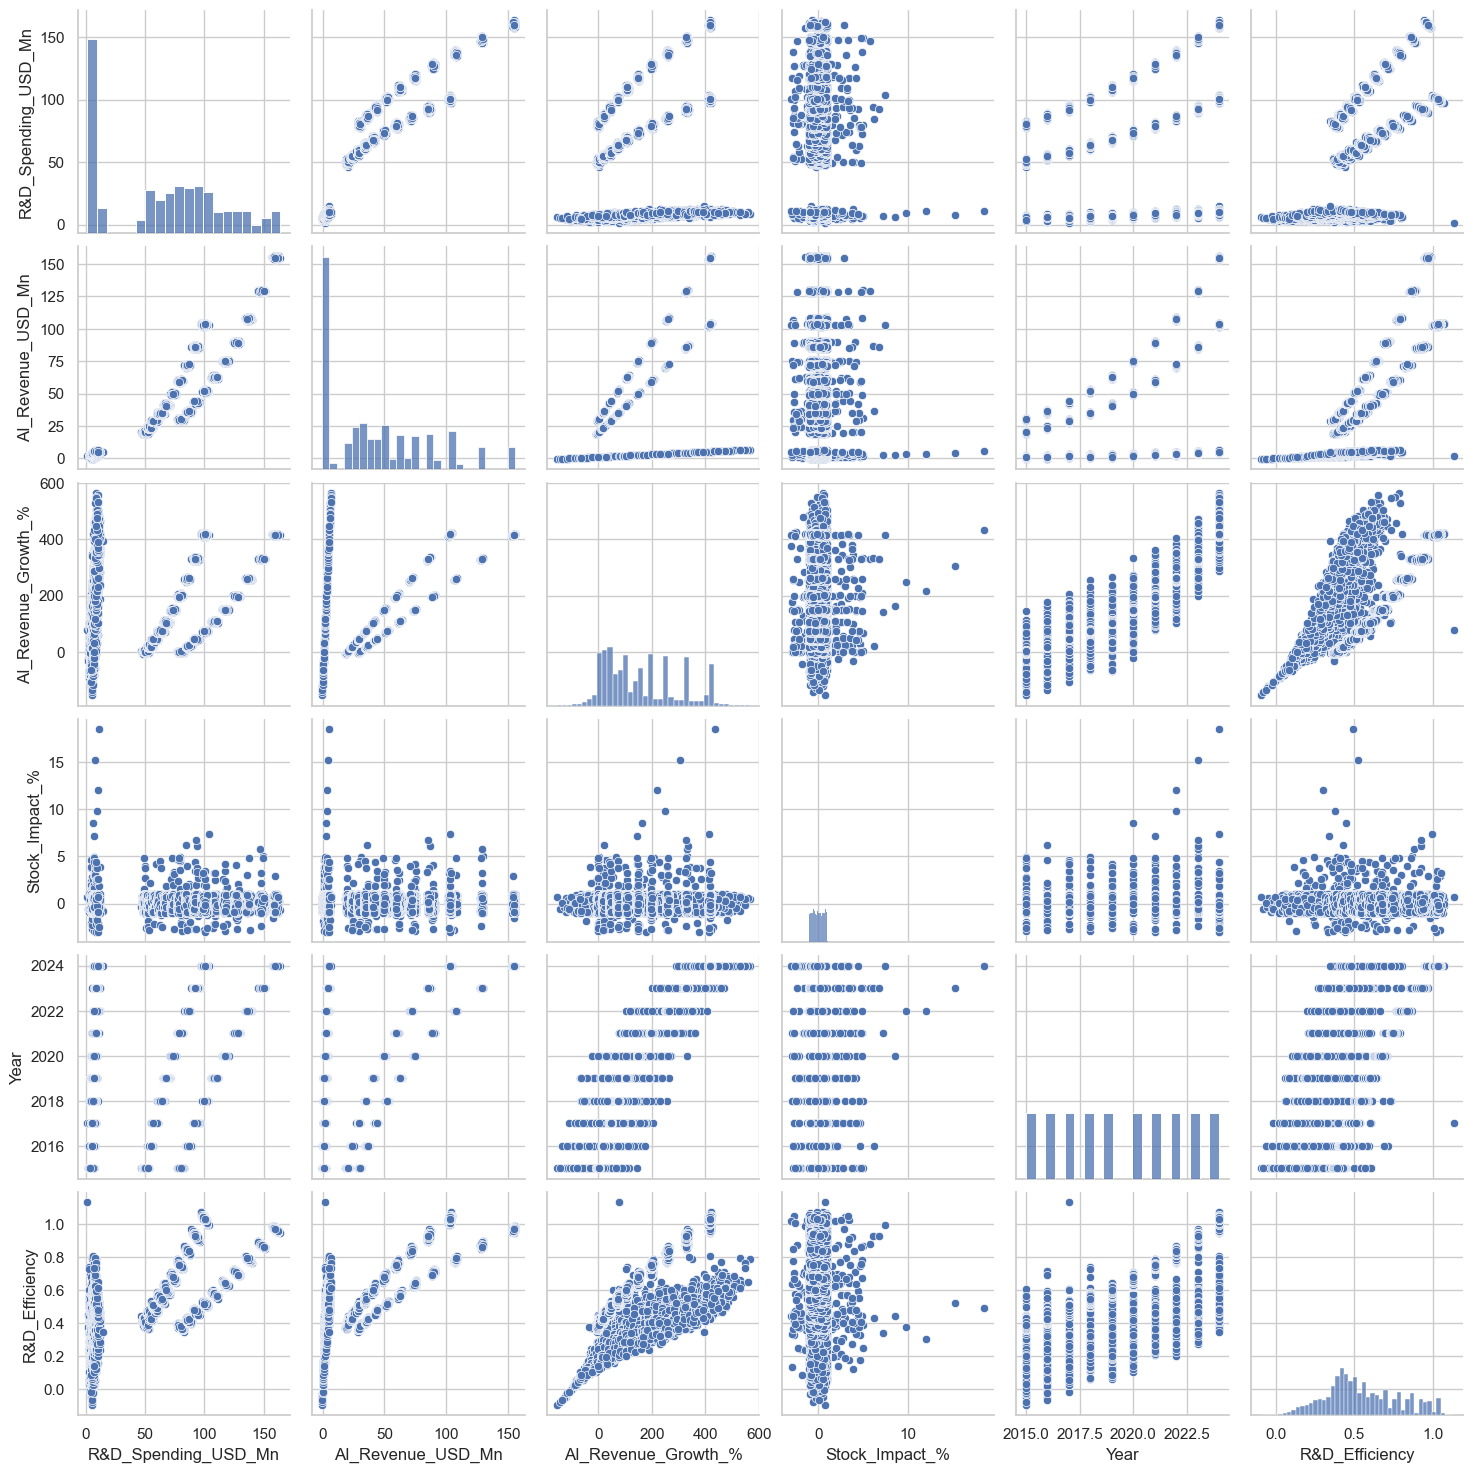

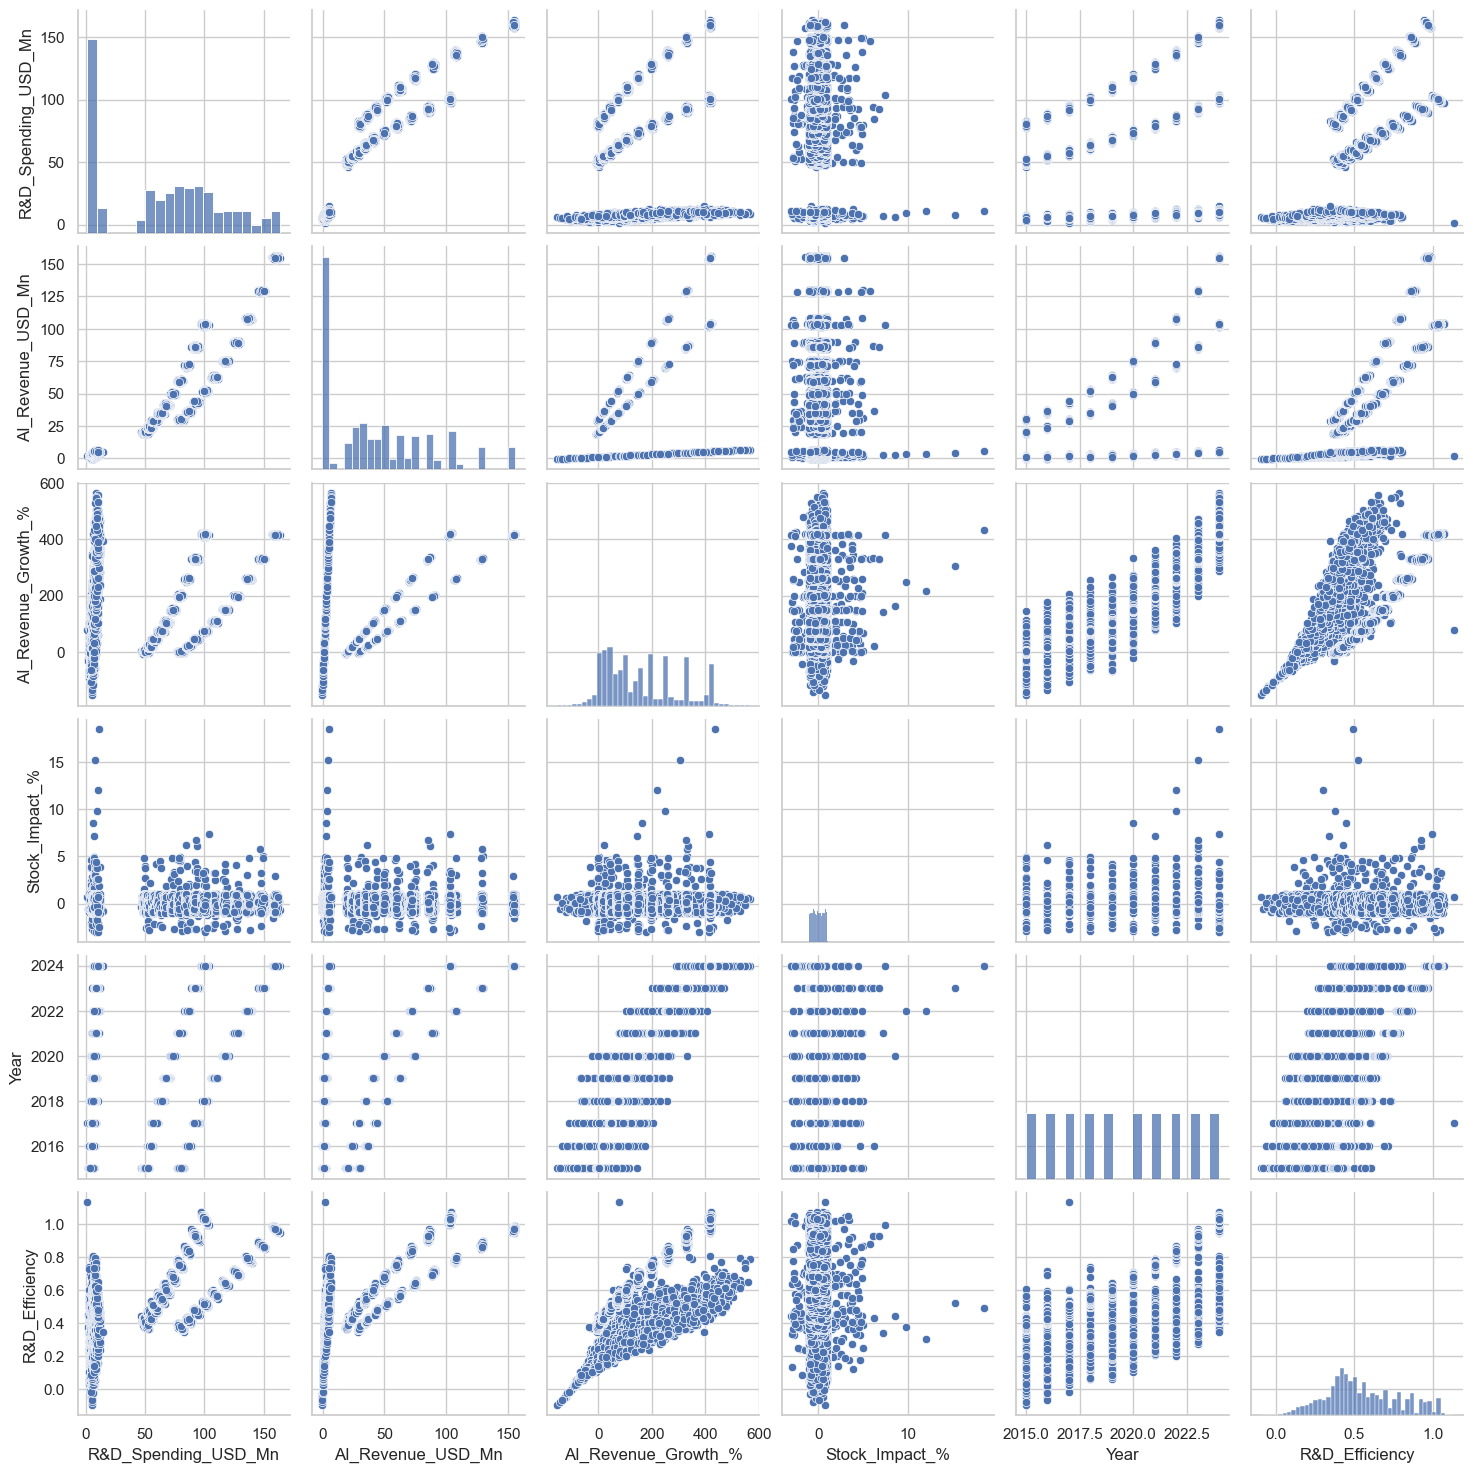

In [95]:
#Relation between the columns 
sns.pairplot(df)
plt.show()

In [73]:
#Expanditure VS Revenue

In [74]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%,Year,R&D_Efficiency
0,2015-01-01,OpenAI,5.92,0.63,-36.82,-0.36,2015,0.106419
1,2015-01-02,OpenAI,5.41,1.81,80.59,0.41,2015,0.334566
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0.23,2015,0.135556
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0.93,2015,0.174312
4,2015-01-05,OpenAI,3.40,1.48,48.45,-0.09,2015,0.435294
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,-0.66,2024,1.033436
10955,2024-12-28,Meta,99.12,102.37,411.86,-0.57,2024,1.032789
10956,2024-12-29,Meta,98.95,103.11,415.54,-0.52,2024,1.042041
10957,2024-12-30,Meta,100.74,103.21,416.03,0.22,2024,1.024519


In [87]:
print('Sum of Expanditure Each Year Combined: ')
exp=df.groupby('Year')['R&D_Spending_USD_Mn'].sum()
print(exp)

Sum of Expanditure Each Year Combined: 
Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64


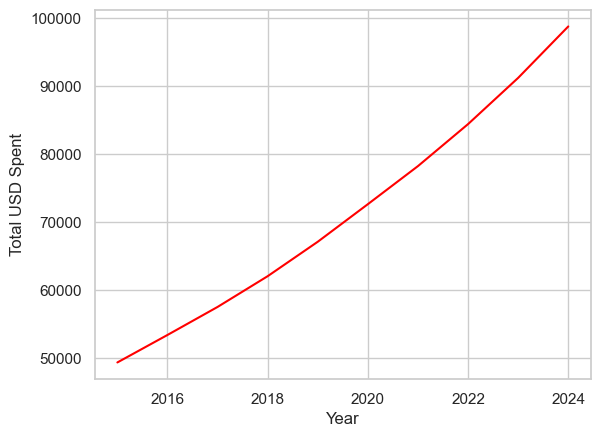

In [88]:
plt.plot(exp.index, exp.values, color='red')
plt.xlabel('Year')
plt.ylabel('Total USD Spent')
plt.show()

In [89]:
#Combined revenue
print('Total Revenue Gained Combined: ')
cr=df.groupby('Year')['AI_Revenue_USD_Mn'].sum()
print(cr)

Total Revenue Gained Combined: 
Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64


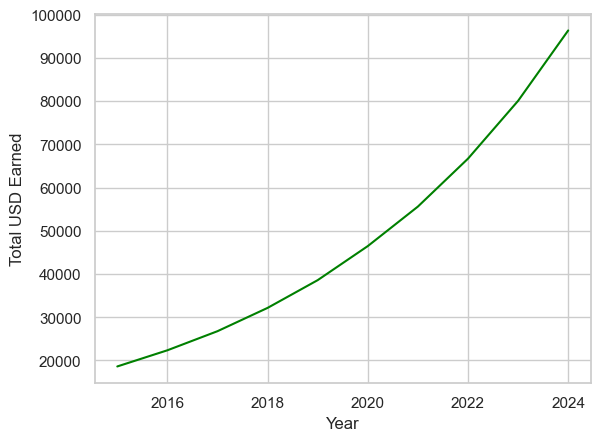

In [90]:
plt.plot(cr.index, cr.values, color='green')
plt.xlabel('Year')
plt.ylabel('Total USD Earned')
plt.show()

Total Amount Spent Vs Total Revenue Earned


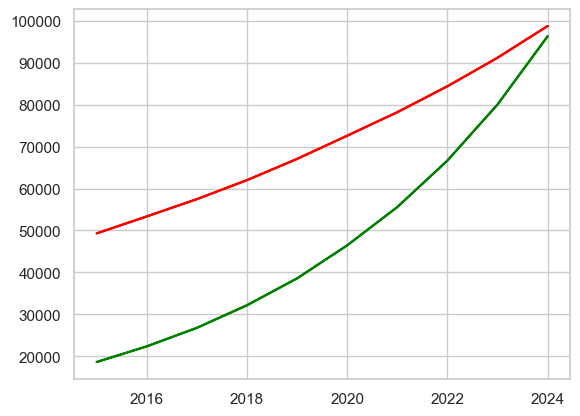

In [93]:
print('Total Amount Spent Vs Total Revenue Earned')
plt.plot(exp.index, exp.values, color='red')
plt.plot(cr.index, cr.values, color='green')
plt.show()